In [39]:
import nltk
from nltk.sentiment import SentimentIntensityAnalyzer as SIA
import pandas as pd
import praw
import pprint
import matplotlib.pyplot as plt

In [40]:
sia = SIA()
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to C:\Users\Shardul
[nltk_data]     Gawande\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

Get Headlines From Reddit

In [41]:
user_agent = "Shardul"
reddit = praw.Reddit(
    client_id = "S01m3fFoGav5b5-cHJXTXA",
    client_secret = "1AmNtLm14-30MjCPlbpegoEYHa9r2w",
    user_agent = user_agent
)

headlines = set()
for submission in reddit.subreddit('politics').hot(limit=None):
    headlines.add(submission.title)

for submission in reddit.subreddit('news').hot(limit=None):
    headlines.add(submission.title)

for submission in reddit.subreddit('worldnews').hot(limit=None):
    headlines.add(submission.title)
    
print(len(headlines))

1473


In [42]:
import pandas as pd
df = pd.DataFrame(headlines)
df.head()

,0
0,"Myanmar crackdown on business escalates, 16 mo..."
1,UN secretary general says comments on Hamas at...
2,"Pope says it's ""urgent"" to guarantee governanc..."
3,Off-duty pilot may have been on psychedelic mu...
4,Republican Mike Johnson has secured enough vot...


In [43]:
df.to_csv('headlines.csv', header = False, encoding = 'utf-8', index = False)

Perform Sentiment Analysis

In [44]:
results = []

for line in headlines:
    polarity_score = sia.polarity_scores(line)   #Outputs dict
    polarity_score['headline'] = line
    results.append(polarity_score)

print(results[0:3])

[{'neg': 0.211, 'neu': 0.789, 'pos': 0.0, 'compound': -0.539, 'headline': 'Myanmar crackdown on business escalates, 16 more executives jailed over palm oil import scheme'}, {'neg': 0.324, 'neu': 0.676, 'pos': 0.0, 'compound': -0.7717, 'headline': "UN secretary general says comments on Hamas attack were 'misrepresented,' as Israel retaliates with visa ban"}, {'neg': 0.0, 'neu': 0.875, 'pos': 0.125, 'compound': 0.25, 'headline': 'Pope says it\'s "urgent" to guarantee governance roles for women during meeting on church future'}]


In [45]:
df = pd.DataFrame.from_records(results)
df.head()

,neg,neu,pos,compound,headline
0,0.211,0.789,0.000,-0.5390,"Myanmar crackdown on business escalates, 16 mo..."
1,0.324,0.676,0.000,-0.7717,UN secretary general says comments on Hamas at...
2,0.000,0.875,0.125,0.2500,"Pope says it's ""urgent"" to guarantee governanc..."
3,0.000,1.000,0.000,0.0000,Off-duty pilot may have been on psychedelic mu...
4,0.000,0.847,0.153,0.4019,Republican Mike Johnson has secured enough vot...


Label and Create new CSV File

In [46]:
df['label'] = 0
df.loc[df['compound'] > 0.2, 'label'] = 1
df.loc[df['compound'] < 0.2, 'label'] = -1
df.loc[df['compound'] == 0, 'label'] = 0
df.head()

,neg,neu,pos,compound,headline,label
0,0.211,0.789,0.000,-0.5390,"Myanmar crackdown on business escalates, 16 mo...",-1
1,0.324,0.676,0.000,-0.7717,UN secretary general says comments on Hamas at...,-1
2,0.000,0.875,0.125,0.2500,"Pope says it's ""urgent"" to guarantee governanc...",1
3,0.000,1.000,0.000,0.0000,Off-duty pilot may have been on psychedelic mu...,0
4,0.000,0.847,0.153,0.4019,Republican Mike Johnson has secured enough vot...,1


In [47]:
df2 = df[['label', 'headline']]
df2.head()
df2.to_csv('Labeled_Headlines.csv', header = False, encoding = 'utf-8', index = False)

Practical Examples

In [48]:
# Check how many headlines are positive, negative and neutral
df2['label'].value_counts(-1)*100

-1    54.514596
 0    29.871012
 1    15.614392
Name: label, dtype: float64

In [49]:
# Print the bad and good headlines

pp = pprint.PrettyPrinter(indent=4)
print('Good Headlines \n')
pp.pprint(list(df2.query('label == 1')['headline'])[:5])

print('\nBad Headlines \n')
pp.pprint(list(df2.query('label == -1')['headline'])[:5])

Good Headlines 

[   'Pope says it\'s "urgent" to guarantee governance roles for women during '
    'meeting on church future',
    'Republican Mike Johnson has secured enough votes to become House speaker '
    'as ballot draws to a close',
    'In Michigan, Muslim and Arab American Voters Reconsider Support for Biden',
    "Louisiana's 'In God We Trust' law tests limits of religion in public "
    'schools',
    'MAGA wants to abolish plea deals to save Donald Trump']

Bad Headlines 

[   'Myanmar crackdown on business escalates, 16 more executives jailed over '
    'palm oil import scheme',
    "UN secretary general says comments on Hamas attack were 'misrepresented,' "
    'as Israel retaliates with visa ban',
    'Georgia’s lieutenant governor wants to pay teachers $10,000 a year to '
    'carry guns at school',
    'Gazans Release Names of 6,747 People They Say Were Killed in Israeli '
    'Strikes',
    'Judge denies motion to block Ivanka Trump testimony in New York civil '
   

[803, 440, 230]


C:\Users\Shardul Gawande\AppData\Local\Temp\ipykernel_12420\1036277671.py:16: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(131)


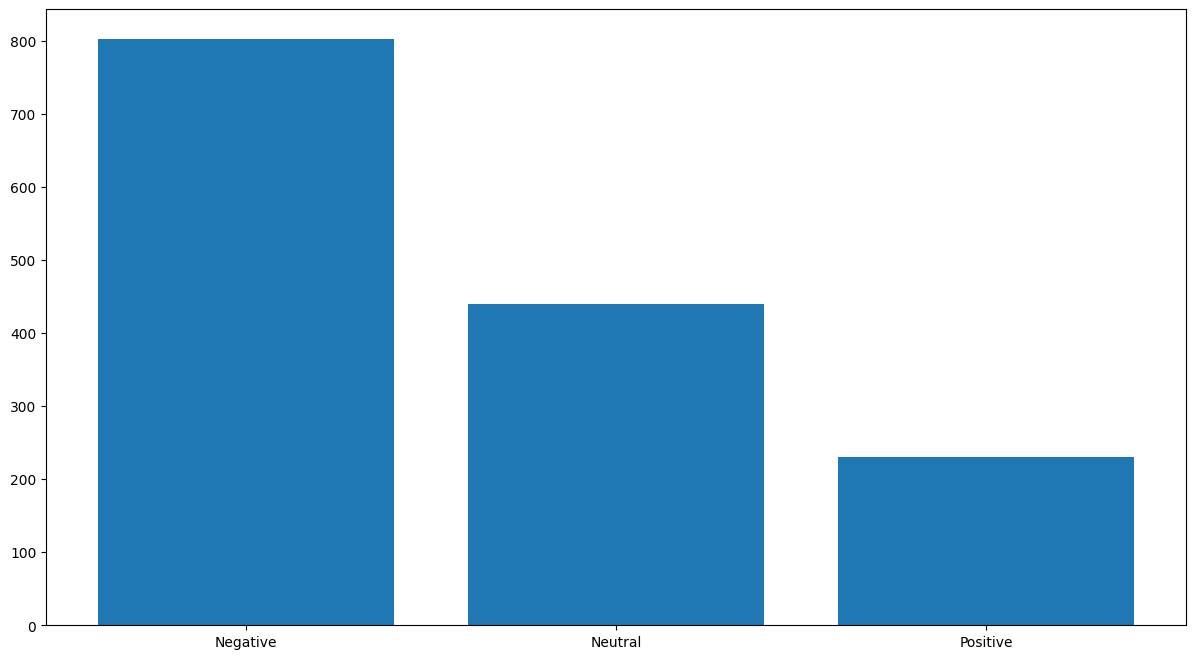

In [50]:
# Create a Bar Chart

fig, ax = plt.subplots(figsize = (50, 8))
categories = ['Negative', 'Neutral', 'Positive']
values = [0]*3
for label in df2['label']:
    if label == -1:
        values[0] += 1
    if label == 0:
        values[1] += 1
    if label == 1:
        values[2] += 1

print(values)
plt.title('Headline Labels')
plt.subplot(131)
plt.bar(categories, values)

plt.show()